# Training resgression models to predict score of a post as well as its number of comments.

In [3]:
# importing packages

from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

import sklearn
import pandas as pd, numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def replaceThisInsaneNa(x):
    if pd.isna(x):
        return " "
    else:
        return x
    

def datasetToTfIdfPredictorsAndLabels_score(df, vectorizer1, vectorizer2):
    
    text_bgw = pd.DataFrame(vectorizer1.fit_transform(df.text).toarray(), dtype = 'float32').reset_index(drop=True)
    text_bgw.columns = vectorizer1.get_feature_names()
    new_columns = []

    for column in text_bgw.columns:
        new_columns.append("text_" + column)

    text_bgw.columns = new_columns   
    
    title_bgw = pd.DataFrame(vectorizer2.fit_transform(df.title).toarray(), dtype = 'float32').reset_index(drop=True)
    title_bgw.columns = vectorizer2.get_feature_names()
    
    new_columns = []

    for column in title_bgw.columns:
        new_columns.append("title_" + column)

    title_bgw.columns = new_columns
    
    X = pd.concat([df[["title_wc", "selftext_wc", "title_cc", "selftext_cc"]].reset_index(drop=True), text_bgw, title_bgw], axis=1, join="inner")
    
    return X, df[["score"]]

def datasetToTfIdfPredictorsAndLabelsForTest_score(df, vectorizer1, vectorizer2):
    
    text_bgw = pd.DataFrame(vectorizer1.transform(df.text).toarray(), dtype = 'float32').reset_index(drop=True)
    text_bgw.columns = vectorizer1.get_feature_names()
    new_columns = []

    for column in text_bgw.columns:
        new_columns.append("text_" + column)

    text_bgw.columns = new_columns   
    
    title_bgw = pd.DataFrame(vectorizer2.transform(df.title).toarray(), dtype = 'float32').reset_index(drop=True)
    title_bgw.columns = vectorizer2.get_feature_names()
    
    new_columns = []

    for column in title_bgw.columns:
        new_columns.append("title_" + column)

    title_bgw.columns = new_columns
    
    X = pd.concat([df[["title_wc", "selftext_wc", "title_cc", "selftext_cc"]].reset_index(drop=True), text_bgw, title_bgw], axis=1, join="inner")
    
    return X, df[["score"]]



In [49]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

model = Ridge()
model3 = DecisionTreeRegressor(max_depth = 20)


In [13]:
# importing train and validation AITA datasets:

X_train = pd.read_csv("data/aita_train.csv", index_col=0, dtype = {'flair': 'string', 'title': 'string', 'text': 'string'})
X_trainb = pd.read_csv("data/aita_train_balanced.csv", index_col=0, dtype = {'flair': 'string', 'title': 'string', 'text': 'string'})
X_test = pd.read_csv("data/aita_test.csv", index_col=0, dtype = {'flair': 'string', 'title': 'string', 'text': 'string'})
X_testb = pd.read_csv("data/aita_test_balanced.csv", index_col=0, dtype = {'flair': 'string', 'title': 'string', 'text': 'string'})

X_train = X_train[["score","num_comments", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
X_trainb = X_trainb[["score","num_comments", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
X_test = X_test[["score","num_comments", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]
X_testb = X_testb[["score","num_comments", "title", "text", "title_wc", "selftext_wc", "title_cc", "selftext_cc"]]

X_train.text = X_train.text.apply(replaceThisInsaneNa)
X_trainb.text = X_trainb.text.apply(replaceThisInsaneNa)

X_test.text = X_test.text.apply(replaceThisInsaneNa)
X_testb.text = X_testb.text.apply(replaceThisInsaneNa)

In [15]:
X__train = X_train
X__trainb = X_trainb
X__test = X_test
X__testb = X_testb

In [16]:
df = pd.DataFrame(columns=['method', 'model', 'n_components', 'n_neighbors', 'mse', 'r2', 'train', 'test'])

In [17]:
vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=500)
vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=500)

In [21]:
#X_train, y_train = datasetToTfIdfPredictorsAndLabels(X_train, vectorizer)
#X_test, y_test = datasetToTfIdfPredictorsAndLabels(X_test, vectorizer)
X_trainb, y_trainb = datasetToTfIdfPredictorsAndLabels_score(X__trainb, vectorizer1, vectorizer2)
X_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest_score(X__testb, vectorizer1, vectorizer2)

method_name = "TfIdf-max_features"

print("Fitting Ridge - whole data")
t0 = time()
model.fit(X_trainb, y_trainb)
r2 = model.score(X_testb, y_testb)
y_pred = model.predict(X_testb)
mse = mean_squared_error(y_testb, y_pred)
df = df.append({'method': method_name, 'model':'Ridge', 'n_components': 500, 'n_neighbors': -1, 'mse': mse,'r2':r2, 'train': 'balanced', 'test': 'balanced'}, ignore_index=True)
t1 = time()
print("%s: %.2g sec" % ('Time', t1 - t0))

print("Fitting DecisionTree - whole data")
t0 = time()
model3.fit(X_trainb, y_trainb)
r2 = model3.score(X_testb, y_testb)
y_pred = model3.predict(X_testb)
mse = mean_squared_error(y_testb, y_pred)
df = df.append({'method': method_name, 'model':'DT', 'n_components': 500, 'n_neighbors': -1, 'mse': mse,'r2':r2, 'train': 'balanced', 'test': 'balanced'}, ignore_index=True)
t1 = time()
print("%s: %.2g sec" % ('Time', t1 - t0))

df.to_csv("SCORE-A1.csv")


###########################################################

X_trainb, y_trainb = datasetToTfIdfPredictorsAndLabels_score(X__train, vectorizer1, vectorizer2)
X_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest_score(X__test, vectorizer1, vectorizer2)

method_name = "TfIdf-max_features"

print("Fitting Ridge - whole data")
t0 = time()
model.fit(X_trainb, y_trainb)
r2 = model.score(X_testb, y_testb)
y_pred = model.predict(X_testb)
mse = mean_squared_error(y_testb, y_pred)
df = df.append({'method': method_name, 'model':'Ridge', 'n_components': 500, 'n_neighbors': -1, 'mse': mse, 'r2':r2,'train': 'unbalanced', 'test': 'unbalanced'}, ignore_index=True)
t1 = time()
print("%s: %.2g sec" % ('Time', t1 - t0))

print("Fitting DecisionTree - whole data")
t0 = time()
model3.fit(X_trainb, y_trainb)
r2 = model3.score(X_testb, y_testb)
y_pred = model3.predict(X_testb)
mse = mean_squared_error(y_testb, y_pred)
df = df.append({'method': method_name, 'model':'DT', 'n_components': 500, 'n_neighbors': -1, 'mse': mse,'r2':r2, 'train': 'unbalanced', 'test': 'unbalanced'}, ignore_index=True)
t1 = time()
print("%s: %.2g sec" % ('Time', t1 - t0))

df.to_csv("SCORE-A2.csv")



Fitting Ridge - whole data
Time: 34 sec
Fitting DecisionTree - whole data
Time: 1.6e+02 sec


In [22]:
df

,method,model,n_components,n_neighbors,mse,r2,train,test
0,TfIdf-max_features,Ridge,500,-1,7.466653e+06,0.160636,balanced,balanced
1,TfIdf-max_features,Ridge,500,-1,7.466653e+06,0.160636,balanced,balanced
2,TfIdf-max_features,DT,500,-1,1.414900e+07,-0.590561,balanced,balanced
3,TfIdf-max_features,Ridge,500,-1,4.079718e+06,0.091144,unbalanced,unbalanced
4,TfIdf-max_features,DT,500,-1,4.533456e+06,-0.009937,unbalanced,unbalanced


In [27]:
df = pd.DataFrame(columns=['method', 'model', 'n_components', 'n_neighbors', 'mse', 'r2', 'train', 'test'])

In [28]:
#X_train, y_train = datasetToTfIdfPredictorsAndLabels(X_train, vectorizer)
#X_test, y_test = datasetToTfIdfPredictorsAndLabels(X_test, vectorizer)

model3 = DecisionTreeRegressor(max_depth = 50)


for i in range(50,1400, 50):
    
    vectorizer1 = TfidfVectorizer(stop_words = 'english', max_features=i)
    vectorizer2 = TfidfVectorizer(stop_words = 'english', max_features=i)
    
    X_trainb, y_trainb = datasetToTfIdfPredictorsAndLabels_score(X__trainb, vectorizer1, vectorizer2)
    X_testb, y_testb = datasetToTfIdfPredictorsAndLabelsForTest_score(X__testb, vectorizer1, vectorizer2)

    method_name = "TfIdf-max_features"

    print("Fitting Ridge - whole data")
    t0 = time()
    model.fit(X_trainb, y_trainb)
    r2 = model.score(X_testb, y_testb)
    y_pred = model.predict(X_testb)
    mse = mean_squared_error(y_testb, y_pred)
    df = df.append({'method': method_name, 'model':'Ridge', 'n_components': i, 'n_neighbors': -1, 'mse': mse,'r2':r2, 'train': 'balanced', 'test': 'balanced'}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time', t1 - t0))

    print("Fitting DecisionTree - whole data")
    t0 = time()
    model3.fit(X_trainb, y_trainb)
    r2 = model3.score(X_testb, y_testb)
    y_pred = model3.predict(X_testb)
    mse = mean_squared_error(y_testb, y_pred)
    df = df.append({'method': method_name, 'model':'DT', 'n_components': i, 'n_neighbors': -1, 'mse': mse,'r2':r2, 'train': 'balanced', 'test': 'balanced'}, ignore_index=True)
    t1 = time()
    print("%s: %.2g sec" % ('Time', t1 - t0))

df.to_csv("SCORE-A3.csv")

Fitting Ridge - whole data
Time: 0.06 sec
Fitting DecisionTree - whole data
Time: 1.5 sec
Fitting Ridge - whole data
Time: 0.1 sec
Fitting DecisionTree - whole data
Time: 2.9 sec
Fitting Ridge - whole data
Time: 0.12 sec
Fitting DecisionTree - whole data
Time: 3.5 sec
Fitting Ridge - whole data
Time: 0.18 sec
Fitting DecisionTree - whole data
Time: 4.2 sec
Fitting Ridge - whole data
Time: 0.27 sec
Fitting DecisionTree - whole data
Time: 4.9 sec
Fitting Ridge - whole data
Time: 0.39 sec
Fitting DecisionTree - whole data
Time: 5.8 sec
Fitting Ridge - whole data
Time: 0.41 sec
Fitting DecisionTree - whole data
Time: 6.1 sec
Fitting Ridge - whole data
Time: 0.51 sec
Fitting DecisionTree - whole data
Time: 6.8 sec
Fitting Ridge - whole data
Time: 0.59 sec
Fitting DecisionTree - whole data
Time: 8.1 sec
Fitting Ridge - whole data
Time: 0.69 sec
Fitting DecisionTree - whole data
Time: 7.8 sec
Fitting Ridge - whole data
Time: 0.73 sec
Fitting DecisionTree - whole data
Time: 8.4 sec
Fitting Rid

Text(0.5, 1.0, 'Impact of Tf max_features - AITA dataset')

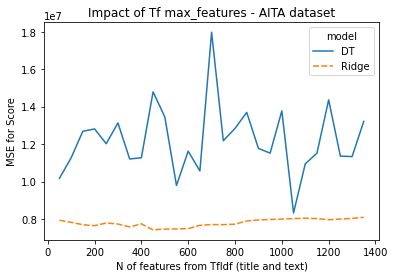

In [29]:
df_wide = df.pivot("n_components", "model", "mse")
p = sns.lineplot(data=df_wide)
#p.set(ylim=(0.1, 0.5))
p.set_xlabel('N of features from TfIdf (title and text)')
p.set_ylabel('MSE for Score')

p.set_title('Impact of Tf max_features - AITA dataset')


In [26]:
df

,method,model,n_components,n_neighbors,mse,r2,train,test
0,TfIdf-max_features,Ridge,500,-1,7.937826e+06,0.107669,balanced,balanced
1,TfIdf-max_features,DT,500,-1,1.129554e+07,-0.269789,balanced,balanced
2,TfIdf-max_features,Ridge,500,-1,7.827096e+06,0.120117,balanced,balanced
3,TfIdf-max_features,DT,500,-1,1.381280e+07,-0.552767,balanced,balanced
4,TfIdf-max_features,Ridge,500,-1,7.700508e+06,0.134347,balanced,balanced
5,TfIdf-max_features,DT,500,-1,1.190849e+07,-0.338694,balanced,balanced
6,TfIdf-max_features,Ridge,500,-1,7.648267e+06,0.140220,balanced,balanced
7,TfIdf-max_features,DT,500,-1,1.210471e+07,-0.360752,balanced,balanced
8,TfIdf-max_features,Ridge,500,-1,7.791928e+06,0.124070,balanced,balanced
9,TfIdf-max_features,DT,500,-1,1.264316e+07,-0.421282,balanced,balanced


In [31]:
np.unique(y_pred)

array([0.00000000e+00, 1.00000000e+00, 1.50000000e+00, 1.87878788e+00,
       5.00000000e+00, 7.00000000e+00, 8.00000000e+00, 1.40000000e+01,
       2.70000000e+01, 3.50000000e+01, 4.70000000e+01, 5.00000000e+01,
       8.27482185e+01, 8.37694826e+01, 1.13000000e+02, 1.46000000e+02,
       2.57000000e+02, 3.55000000e+02, 3.57000000e+02, 3.88340807e+02,
       3.91885870e+02, 4.13000000e+02, 5.05000000e+02, 6.50500000e+02,
       6.71000000e+02, 7.16000000e+02, 1.07200000e+03, 1.23200000e+03,
       1.75200000e+03, 1.95100000e+03, 2.09900000e+03, 2.15700000e+03,
       2.22800000e+03, 2.40500000e+03, 2.86800000e+03, 3.01800000e+03,
       3.48700000e+03, 3.77700000e+03, 5.65400000e+03, 5.97600000e+03,
       6.08900000e+03, 6.16900000e+03, 9.39200000e+03, 9.40900000e+03,
       1.07430000e+04, 1.09300000e+04, 1.19810000e+04, 1.25780000e+04,
       1.28230000e+04, 1.65070000e+04, 1.67150000e+04, 1.73450000e+04,
       1.77980000e+04, 1.94850000e+04, 2.08030000e+04, 2.44650000e+04,
      

In [ ]:
model.fit(X_trainb, y_trainb)
y_pred = model.predict(X_testb)

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

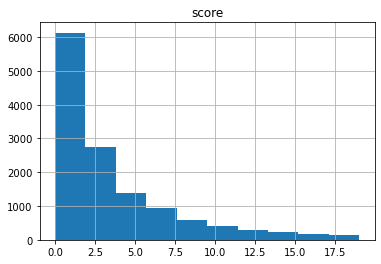

In [38]:
y_trainb[y_trainb.score < 20].hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

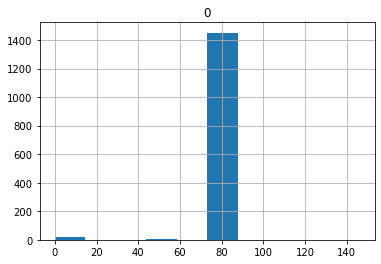

In [46]:
pd.DataFrame(y_pred[y_pred < 200]).hist()

In [47]:
np.mean(y_pred)

441.6620117525683

In [48]:
np.mean(y_trainb.score.values)

428.1968125

In [65]:
model2 = RandomForestRegressor(max_depth = 6, n_estimators = 100)
model2.fit(X_trainb, y_trainb)

C:\Users\Patryk\AppData\Local\Temp/ipykernel_15504/2074208084.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_trainb, y_trainb)


RandomForestRegressor(max_depth=6)

In [67]:
y_pred = model2.predict(X_testb)
mean_squared_error(y_pred, y_testb)

7527980.143485047

In [77]:
np.mean((y_pred < 4 * y_testb.score) & (y_pred > y_testb.score / 4))

0.108125